In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from seaborn import load_dataset
import missingno as msno
from wordcloud import WordCloud 

In [66]:
Spotify=pd.read_csv('C:/Users/Windows10/Desktop/Project/Spotify Quarterly.csv')
Spotify

,Date,Total Revenue,Cost of Revenue,Gross Profit,Premium Revenue,Premium Cost Revenue,Premium Gross Profit,Ad Revenue,Ad Cost of revenue,Ad gross Profit,MAUs,Premium MAUs,Ad MAUs,Premium ARPU,Sales and Marketing Cost,Research and Development Cost,Genreal and Adminstraive Cost
0,31-03-2023,3042.0,2276.0,776.0,2713.0,1937.0,776.0,329.0,339.0,-10.0,515.0,210.0,317.0,4.32,347.0,435.0,140.0
1,31-12-2022,3166.0,2365.0,801.0,2717.0,1939.0,778.0,449.0,426.0,23.0,489.0,205.0,295.0,4.55,453.0,415.0,164.0
2,30-09-2022,3036.0,2286.0,750.0,2651.0,1908.0,743.0,385.0,378.0,7.0,456.0,195.0,273.0,4.63,432.0,386.0,160.0
3,30-06-2022,2864.0,2160.0,704.0,2504.0,1804.0,700.0,360.0,356.0,4.0,433.0,188.0,265.0,4.54,391.0,336.0,171.0
4,31-03-2022,2661.0,1990.0,671.0,2379.0,1704.0,675.0,282.0,286.0,-4.0,422.0,182.0,252.0,4.38,296.0,250.0,131.0
5,31-12-2021,2689.0,1977.0,712.0,2295.0,1625.0,670.0,394.0,352.0,42.0,406.0,180.0,236.0,4.40,340.0,253.0,126.0
6,30-09-2021,2501.0,1833.0,668.0,2178.0,1545.0,633.0,323.0,288.0,35.0,381.0,172.0,220.0,4.34,280.0,208.0,105.0
7,30-06-2021,2331.0,1668.0,663.0,2056.0,1423.0,633.0,275.0,245.0,30.0,365.0,165.0,210.0,4.29,279.0,255.0,117.0
8,31-03-2021,2147.0,1599.0,548.0,1931.0,1393.0,538.0,216.0,206.0,10.0,356.0,158.0,208.0,4.12,236.0,196.0,102.0
9,31-12-2020,2168.0,1593.0,575.0,1887.0,1342.0,545.0,281.0,251.0,30.0,345.0,155.0,199.0,4.26,294.0,232.0,118.0


In [67]:
Spotify.shape

(26, 17)

In [68]:
Spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           26 non-null     object 
 1   Total Revenue                  25 non-null     float64
 2   Cost of Revenue                25 non-null     float64
 3   Gross Profit                   25 non-null     float64
 4   Premium Revenue                25 non-null     float64
 5   Premium Cost Revenue           25 non-null     float64
 6   Premium Gross Profit           25 non-null     float64
 7   Ad Revenue                     25 non-null     float64
 8   Ad Cost of revenue             25 non-null     float64
 9   Ad gross Profit                25 non-null     float64
 10  MAUs                           25 non-null     float64
 11  Premium MAUs                   25 non-null     float64
 12  Ad MAUs                        25 non-null     float

In [69]:
type(Spotify)

pandas.core.frame.DataFrame

In [70]:
Spotify.columns

Index(['Date', 'Total Revenue', 'Cost of Revenue', 'Gross Profit',
       'Premium Revenue', 'Premium Cost Revenue', 'Premium Gross Profit',
       'Ad Revenue', 'Ad Cost of revenue', 'Ad gross Profit', 'MAUs',
       'Premium MAUs', 'Ad MAUs', 'Premium ARPU', 'Sales and Marketing Cost',
       'Research and Development Cost', 'Genreal and Adminstraive Cost'],
      dtype='object')

In [71]:
Spotify.describe()

,Total Revenue,Cost of Revenue,Gross Profit,Premium Revenue,Premium Cost Revenue,Premium Gross Profit,Ad Revenue,Ad Cost of revenue,Ad gross Profit,MAUs,Premium MAUs,Ad MAUs,Premium ARPU,Sales and Marketing Cost,Research and Development Cost,Genreal and Adminstraive Cost
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,26.000000,25.000000,25.000000,25.000000
mean,1949.200000,1448.320000,501.280000,1721.400000,1247.040000,474.360000,215.760000,201.680000,14.080000,294.720000,130.080000,172.52000,4.702308,243.840000,203.000000,102.360000
std,688.571468,511.590634,188.493484,599.337203,409.621419,191.566977,107.578762,105.019332,15.739864,117.212599,49.435918,71.70258,0.452560,95.165505,101.236522,34.507101
min,902.000000,775.000000,105.000000,828.000000,686.000000,118.000000,74.000000,87.000000,-16.000000,131.000000,52.000000,82.00000,4.120000,110.000000,80.000000,42.000000
25%,1449.000000,1010.000000,373.000000,1210.000000,894.000000,316.000000,130.000000,115.000000,4.000000,191.000000,87.000000,109.00000,4.385000,172.000000,135.000000,73.000000
50%,1855.000000,1381.000000,479.000000,1700.000000,1219.000000,481.000000,175.000000,157.000000,18.000000,286.000000,130.000000,163.00000,4.640000,236.000000,173.000000,102.000000
75%,2501.000000,1833.000000,668.000000,2178.000000,1545.000000,633.000000,282.000000,286.000000,25.000000,381.000000,172.000000,220.00000,4.882500,294.000000,253.000000,126.000000
max,3166.000000,2365.000000,801.000000,2717.000000,1939.000000,778.000000,449.000000,426.000000,42.000000,515.000000,210.000000,317.00000,6.000000,453.000000,435.000000,171.000000


In [72]:
Spotify.isnull().sum()

Date                             0
Total Revenue                    1
Cost of Revenue                  1
Gross Profit                     1
Premium Revenue                  1
Premium Cost Revenue             1
Premium Gross Profit             1
Ad Revenue                       1
Ad Cost of revenue               1
Ad gross Profit                  1
MAUs                             1
Premium MAUs                     1
Ad MAUs                          1
Premium ARPU                     0
Sales and Marketing Cost         1
Research and Development Cost    1
Genreal and Adminstraive Cost    1
dtype: int64

In [73]:
Spotify['Total Revenue'].value_counts()

3042.0    1
1855.0    1
1007.0    1
1032.0    1
1449.0    1
1139.0    1
1273.0    1
1352.0    1
1495.0    1
1511.0    1
1667.0    1
1731.0    1
1848.0    1
3166.0    1
1889.0    1
1975.0    1
2168.0    1
2147.0    1
2331.0    1
2501.0    1
2689.0    1
2661.0    1
2864.0    1
3036.0    1
902.0     1
Name: Total Revenue, dtype: int64

<Axes: >

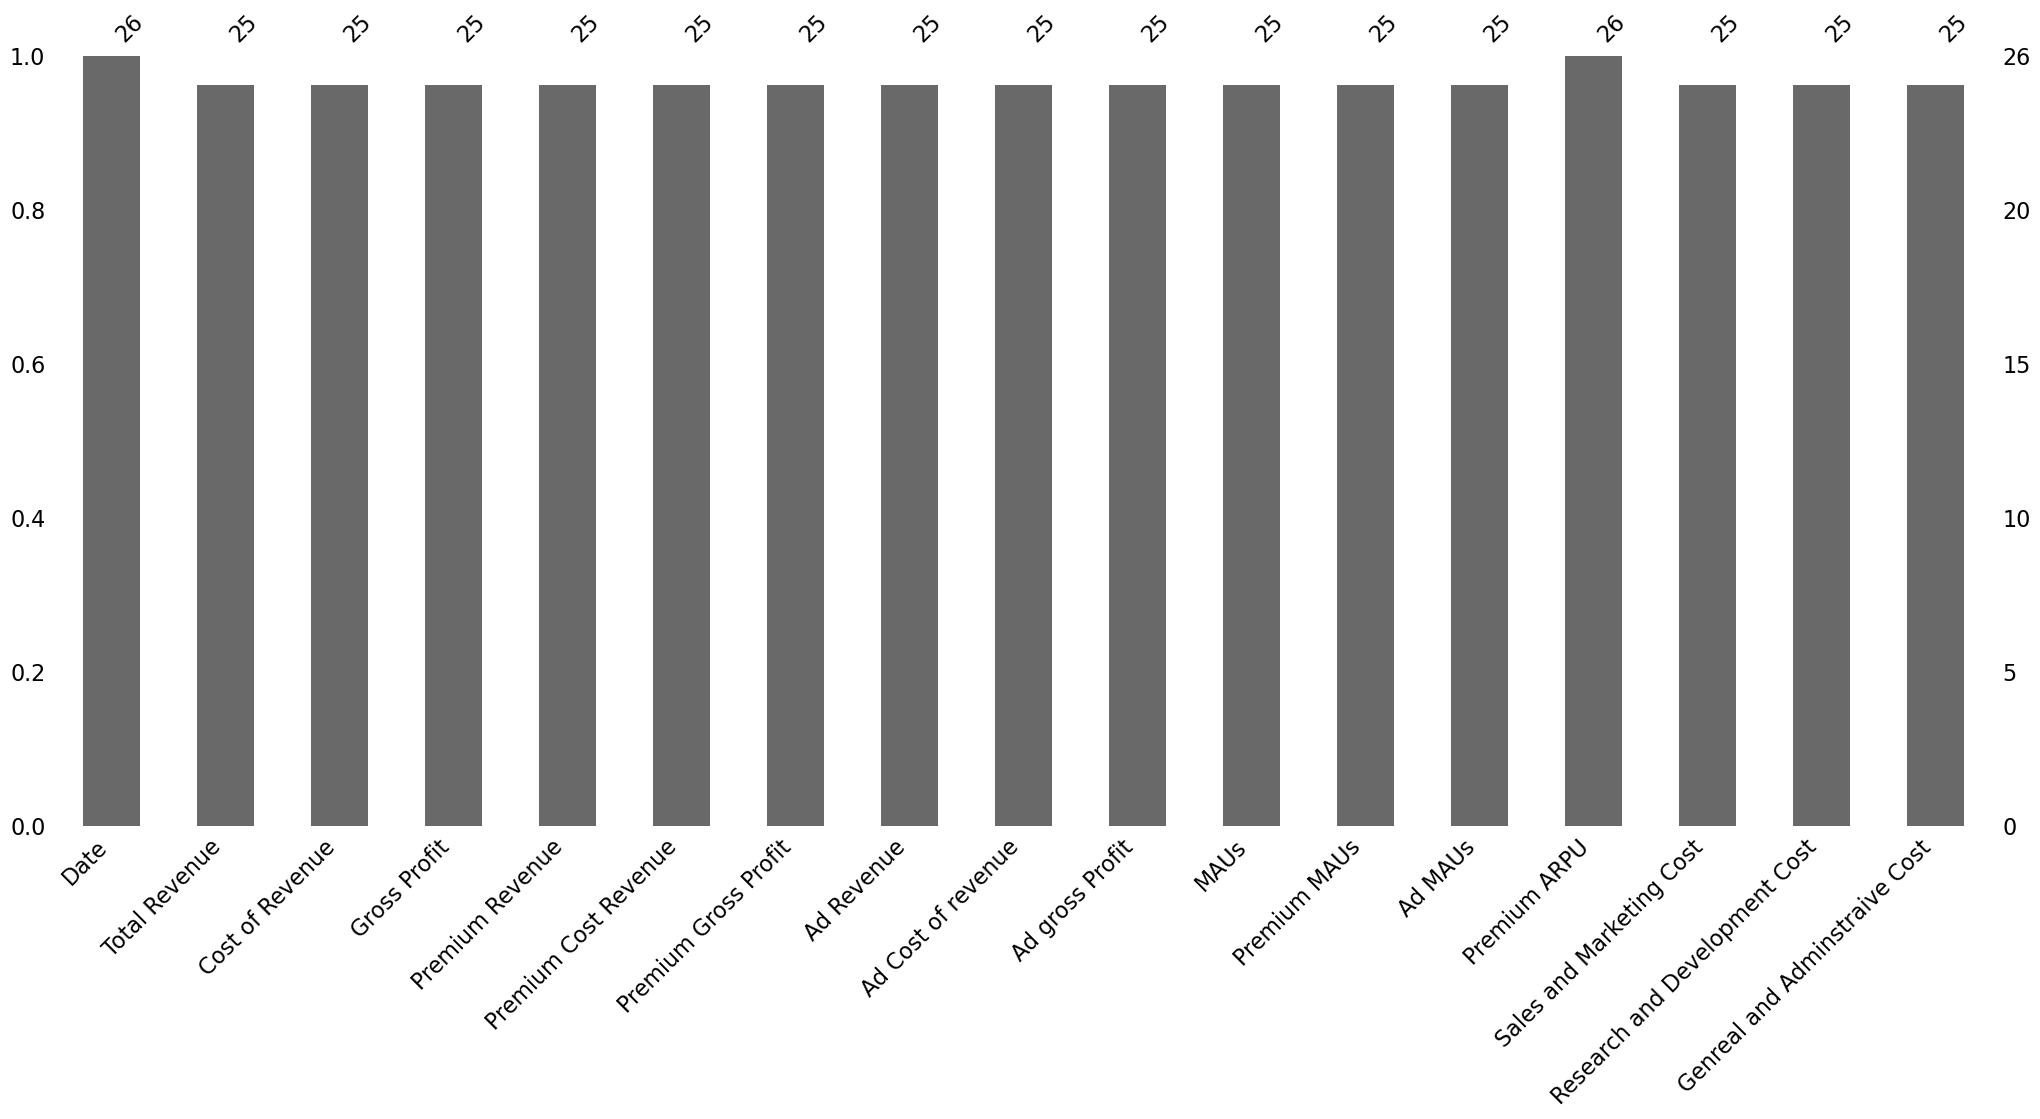

In [74]:
msno.bar(Spotify)

In [75]:
Spotify.tail()

,Date,Total Revenue,Cost of Revenue,Gross Profit,Premium Revenue,Premium Cost Revenue,Premium Gross Profit,Ad Revenue,Ad Cost of revenue,Ad gross Profit,MAUs,Premium MAUs,Ad MAUs,Premium ARPU,Sales and Marketing Cost,Research and Development Cost,Genreal and Adminstraive Cost
21,31-12-2017,1449.0,867.0,582.0,1018.0,761.0,257.0,130.0,106.0,24.0,160.0,71.0,93.0,5.24,173.0,123.0,73.0
22,30-09-2017,1032.0,802.0,230.0,923.0,711.0,212.0,109.0,91.0,18.0,150.0,62.0,91.0,5.06,138.0,98.0,67.0
23,30-06-2017,1007.0,775.0,232.0,904.0,686.0,218.0,103.0,89.0,14.0,138.0,59.0,83.0,5.53,146.0,95.0,70.0
24,31-03-2017,902.0,797.0,105.0,828.0,710.0,118.0,74.0,87.0,-13.0,131.0,52.0,82.0,5.46,110.0,80.0,54.0
25,31-12-2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,NaN,NaN,NaN


### 25th row have most nan values.So we can remove that row. 

In [76]:
Spotify.drop([25],inplace=True)

In [77]:
Spotify

,Date,Total Revenue,Cost of Revenue,Gross Profit,Premium Revenue,Premium Cost Revenue,Premium Gross Profit,Ad Revenue,Ad Cost of revenue,Ad gross Profit,MAUs,Premium MAUs,Ad MAUs,Premium ARPU,Sales and Marketing Cost,Research and Development Cost,Genreal and Adminstraive Cost
0,31-03-2023,3042.0,2276.0,776.0,2713.0,1937.0,776.0,329.0,339.0,-10.0,515.0,210.0,317.0,4.32,347.0,435.0,140.0
1,31-12-2022,3166.0,2365.0,801.0,2717.0,1939.0,778.0,449.0,426.0,23.0,489.0,205.0,295.0,4.55,453.0,415.0,164.0
2,30-09-2022,3036.0,2286.0,750.0,2651.0,1908.0,743.0,385.0,378.0,7.0,456.0,195.0,273.0,4.63,432.0,386.0,160.0
3,30-06-2022,2864.0,2160.0,704.0,2504.0,1804.0,700.0,360.0,356.0,4.0,433.0,188.0,265.0,4.54,391.0,336.0,171.0
4,31-03-2022,2661.0,1990.0,671.0,2379.0,1704.0,675.0,282.0,286.0,-4.0,422.0,182.0,252.0,4.38,296.0,250.0,131.0
5,31-12-2021,2689.0,1977.0,712.0,2295.0,1625.0,670.0,394.0,352.0,42.0,406.0,180.0,236.0,4.40,340.0,253.0,126.0
6,30-09-2021,2501.0,1833.0,668.0,2178.0,1545.0,633.0,323.0,288.0,35.0,381.0,172.0,220.0,4.34,280.0,208.0,105.0
7,30-06-2021,2331.0,1668.0,663.0,2056.0,1423.0,633.0,275.0,245.0,30.0,365.0,165.0,210.0,4.29,279.0,255.0,117.0
8,31-03-2021,2147.0,1599.0,548.0,1931.0,1393.0,538.0,216.0,206.0,10.0,356.0,158.0,208.0,4.12,236.0,196.0,102.0
9,31-12-2020,2168.0,1593.0,575.0,1887.0,1342.0,545.0,281.0,251.0,30.0,345.0,155.0,199.0,4.26,294.0,232.0,118.0


In [78]:
Spotify.columns

Index(['Date', 'Total Revenue', 'Cost of Revenue', 'Gross Profit',
       'Premium Revenue', 'Premium Cost Revenue', 'Premium Gross Profit',
       'Ad Revenue', 'Ad Cost of revenue', 'Ad gross Profit', 'MAUs',
       'Premium MAUs', 'Ad MAUs', 'Premium ARPU', 'Sales and Marketing Cost',
       'Research and Development Cost', 'Genreal and Adminstraive Cost'],
      dtype='object')

In [79]:
cost=Spotify.loc[:,['Date','Sales and Marketing Cost','Research and Development Cost', 'Genreal and Adminstraive Cost']]
cost

,Date,Sales and Marketing Cost,Research and Development Cost,Genreal and Adminstraive Cost
0,31-03-2023,347.0,435.0,140.0
1,31-12-2022,453.0,415.0,164.0
2,30-09-2022,432.0,386.0,160.0
3,30-06-2022,391.0,336.0,171.0
4,31-03-2022,296.0,250.0,131.0
5,31-12-2021,340.0,253.0,126.0
6,30-09-2021,280.0,208.0,105.0
7,30-06-2021,279.0,255.0,117.0
8,31-03-2021,236.0,196.0,102.0
9,31-12-2020,294.0,232.0,118.0


<function matplotlib.pyplot.show(close=None, block=None)>

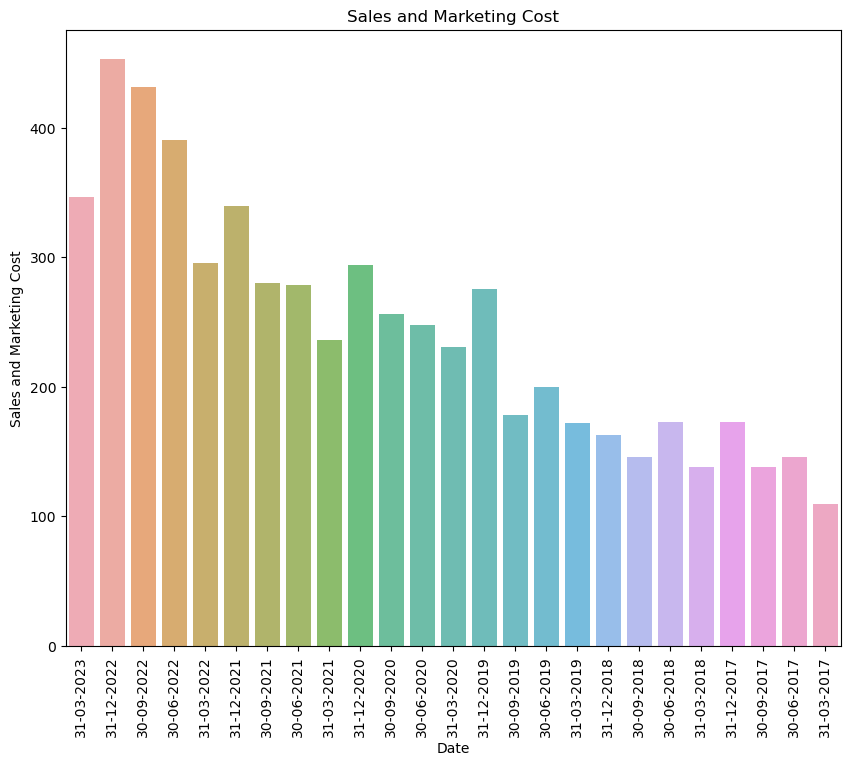

In [80]:
plt.figure(figsize=(10,8))
sns.barplot(x='Date',y='Sales and Marketing Cost',data=cost,alpha=0.8)
plt.xticks(rotation=90)
plt.title('Sales and Marketing Cost')
plt.show

In [81]:
cost['Sales and Marketing Cost'].mean()

243.84

In [82]:
cost1=cost[cost['Sales and Marketing Cost']>243.84]
cost1.sort_values('Sales and Marketing Cost',ascending=False)

,Date,Sales and Marketing Cost,Research and Development Cost,Genreal and Adminstraive Cost
1,31-12-2022,453.0,415.0,164.0
2,30-09-2022,432.0,386.0,160.0
3,30-06-2022,391.0,336.0,171.0
0,31-03-2023,347.0,435.0,140.0
5,31-12-2021,340.0,253.0,126.0
4,31-03-2022,296.0,250.0,131.0
9,31-12-2020,294.0,232.0,118.0
6,30-09-2021,280.0,208.0,105.0
7,30-06-2021,279.0,255.0,117.0
13,31-12-2019,276.0,173.0,102.0


### From the data we can find average cost spend on sales and marketing is 243.84. But from the data we can see 12 days spend more on sales and marketing. 

<function matplotlib.pyplot.show(close=None, block=None)>

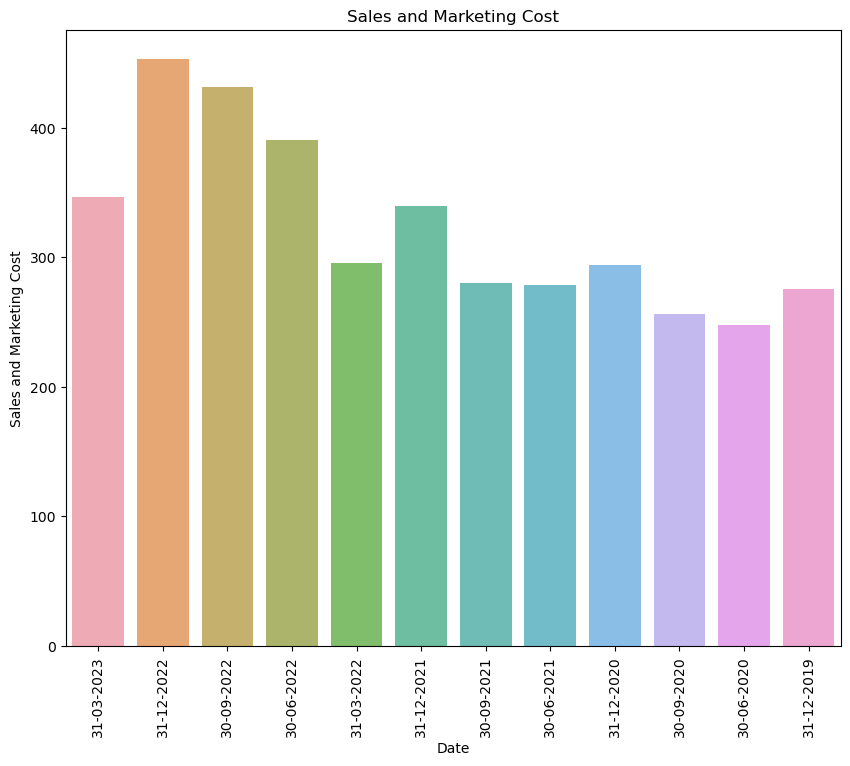

In [83]:
plt.figure(figsize=(10,8))
sns.barplot(x='Date',y='Sales and Marketing Cost',data=cost1,alpha=0.8)
plt.xticks(rotation=90)
plt.title('Sales and Marketing Cost')
plt.show

### December 2022 and September 2022 are the months which spend more on sales and marketing, which is above 400.

<function matplotlib.pyplot.show(close=None, block=None)>

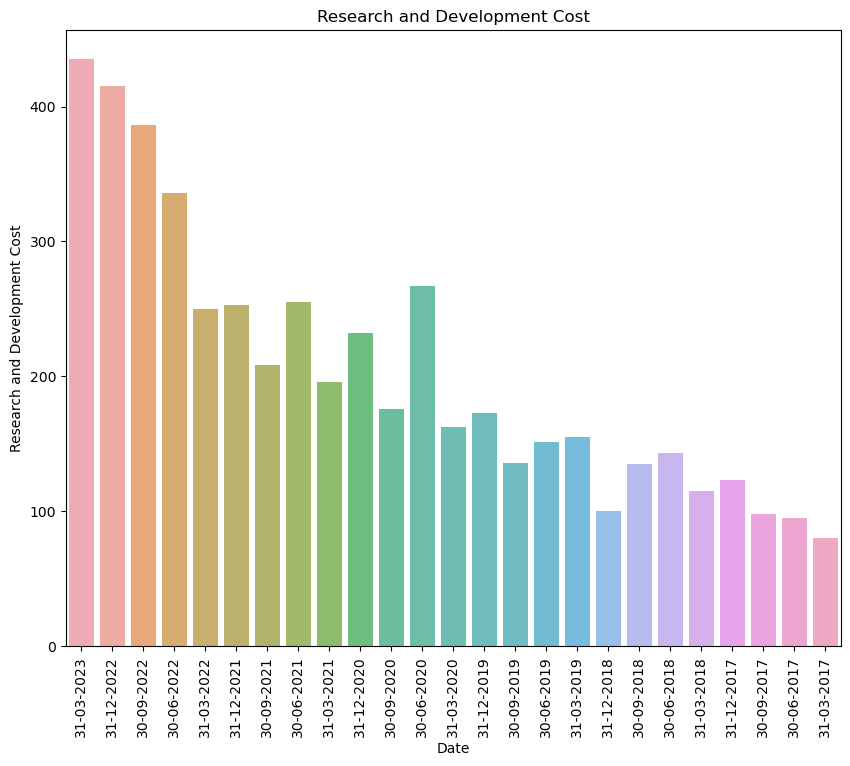

In [84]:
plt.figure(figsize=(10,8))
sns.barplot(x='Date',y='Research and Development Cost',data=cost,alpha=0.8)
plt.xticks(rotation=90)
plt.title('Research and Development Cost')
plt.show

In [85]:
cost['Research and Development Cost'].mean()

203.0

In [86]:
cost2=cost[cost['Research and Development Cost']>203]
cost2.sort_values('Research and Development Cost',ascending=False)

,Date,Sales and Marketing Cost,Research and Development Cost,Genreal and Adminstraive Cost
0,31-03-2023,347.0,435.0,140.0
1,31-12-2022,453.0,415.0,164.0
2,30-09-2022,432.0,386.0,160.0
3,30-06-2022,391.0,336.0,171.0
11,30-06-2020,248.0,267.0,131.0
7,30-06-2021,279.0,255.0,117.0
5,31-12-2021,340.0,253.0,126.0
4,31-03-2022,296.0,250.0,131.0
9,31-12-2020,294.0,232.0,118.0
6,30-09-2021,280.0,208.0,105.0


### From the data we can find average cost spend on Research and Development is 203.0 . But from the data we can see 10 days spend more on Research and Development. 

<function matplotlib.pyplot.show(close=None, block=None)>

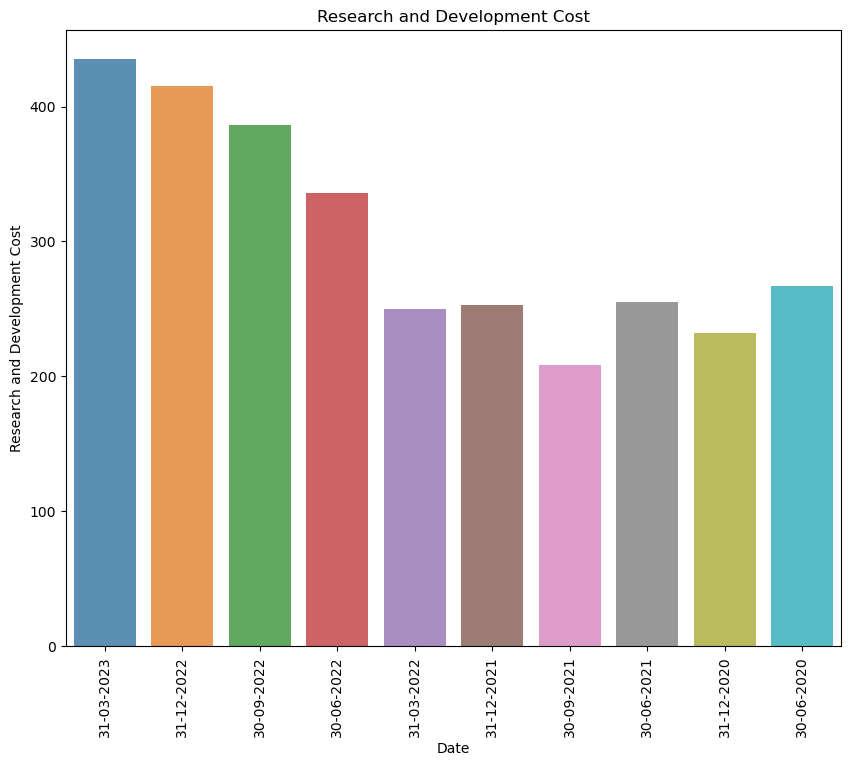

In [87]:
plt.figure(figsize=(10,8))
sns.barplot(x='Date',y='Research and Development Cost',data=cost2,alpha=0.8)
plt.xticks(rotation=90)
plt.title('Research and Development Cost')
plt.show

### March 2023, December 2022 ,September 2022 and June 2022  are the months which spend more on Research and Development , which is above 300. Also from the bar diagram, we can see cost spend on  Research and Development is increasing as the month goes on.

<function matplotlib.pyplot.show(close=None, block=None)>

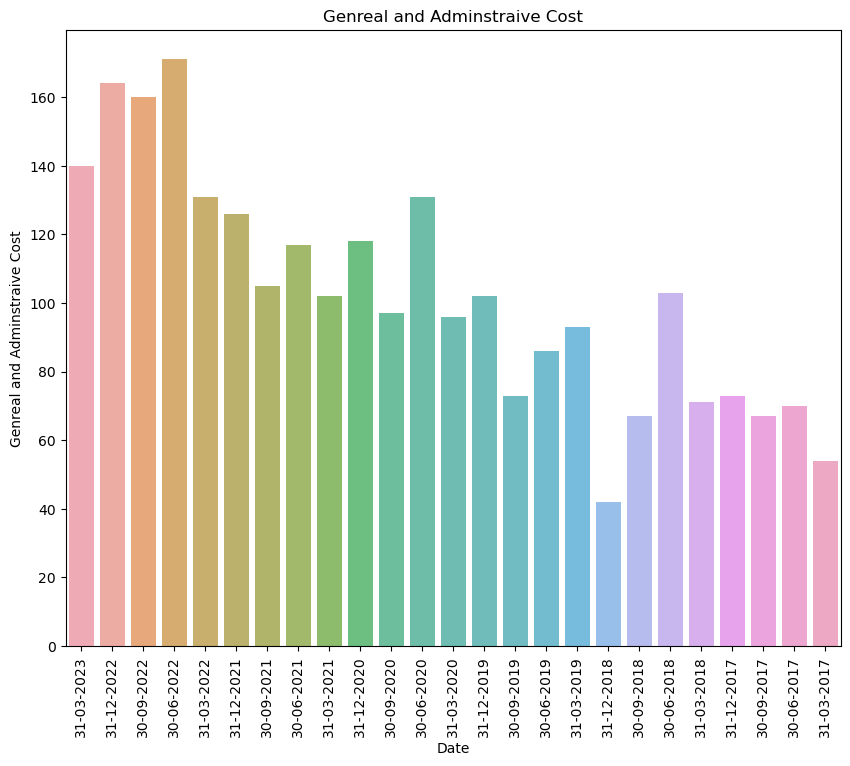

In [88]:
plt.figure(figsize=(10,8))
sns.barplot(x='Date',y='Genreal and Adminstraive Cost',data=cost,alpha=0.8)
plt.xticks(rotation=90)
plt.title('Genreal and Adminstraive Cost')
plt.show

In [89]:
cost['Genreal and Adminstraive Cost'].mean()

102.36

In [90]:
cost3=cost[cost['Genreal and Adminstraive Cost']>102.36]
cost3.sort_values('Genreal and Adminstraive Cost',ascending=False)

,Date,Sales and Marketing Cost,Research and Development Cost,Genreal and Adminstraive Cost
3,30-06-2022,391.0,336.0,171.0
1,31-12-2022,453.0,415.0,164.0
2,30-09-2022,432.0,386.0,160.0
0,31-03-2023,347.0,435.0,140.0
4,31-03-2022,296.0,250.0,131.0
11,30-06-2020,248.0,267.0,131.0
5,31-12-2021,340.0,253.0,126.0
9,31-12-2020,294.0,232.0,118.0
7,30-06-2021,279.0,255.0,117.0
6,30-09-2021,280.0,208.0,105.0


### From the data we can find average cost spend on Genreal and Adminstraive  is 102.36 . But from the data we can see 11 days spend more on Genreal and Adminstraive.

<function matplotlib.pyplot.show(close=None, block=None)>

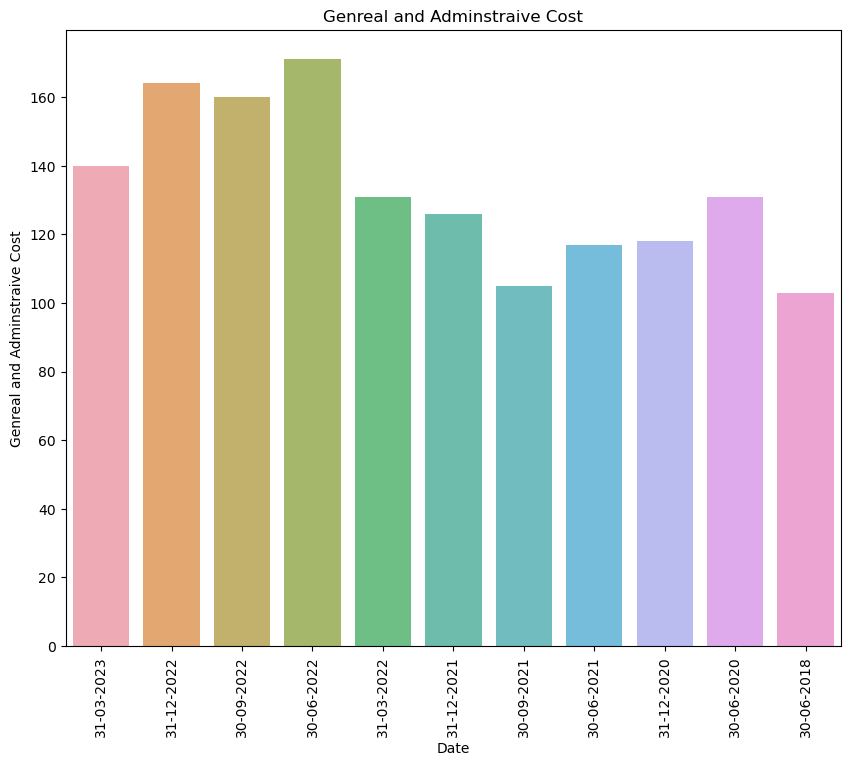

In [91]:
plt.figure(figsize=(10,8))
sns.barplot(x='Date',y='Genreal and Adminstraive Cost',data=cost3,alpha=0.8)
plt.xticks(rotation=90)
plt.title('Genreal and Adminstraive Cost')
plt.show

### December 2022 ,September 2022 and June 2022 spend 160 and above on Genreal and Adminstraive. But in March 2023 it has been decreased to 140. 

In [92]:
Sum_of_cost=Spotify.loc[:,['Sales and Marketing Cost','Research and Development Cost', 'Genreal and Adminstraive Cost']]
Sum_of_cost.sum()

Sales and Marketing Cost         6096.0
Research and Development Cost    5075.0
Genreal and Adminstraive Cost    2559.0
dtype: float64

### From the data, money spend more for Sales and Marketing.  

In [93]:
Spotify.columns

Index(['Date', 'Total Revenue', 'Cost of Revenue', 'Gross Profit',
       'Premium Revenue', 'Premium Cost Revenue', 'Premium Gross Profit',
       'Ad Revenue', 'Ad Cost of revenue', 'Ad gross Profit', 'MAUs',
       'Premium MAUs', 'Ad MAUs', 'Premium ARPU', 'Sales and Marketing Cost',
       'Research and Development Cost', 'Genreal and Adminstraive Cost'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

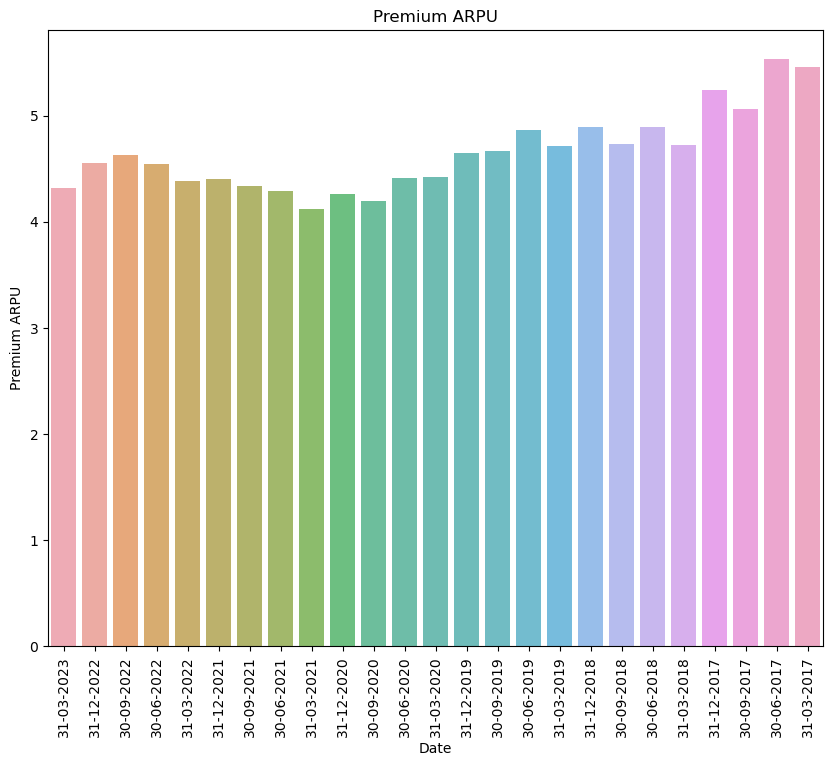

In [94]:
plt.figure(figsize=(10,8))
sns.barplot(x='Date',y='Premium ARPU',data=Spotify,alpha=0.8)
plt.xticks(rotation=90)
plt.title('Premium ARPU')
plt.show

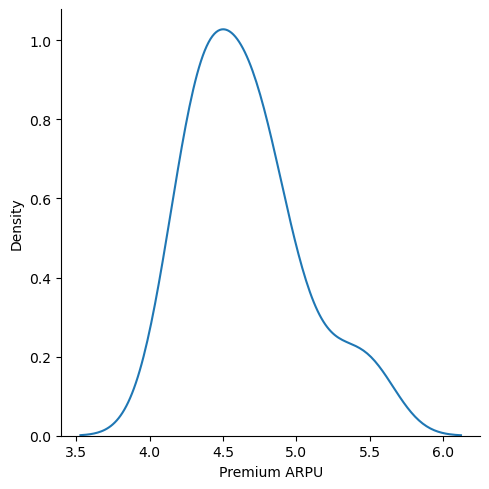

In [95]:
sns.displot(Spotify['Premium ARPU'],kind='kde')

In [96]:
Spotify['Premium ARPU'].max()

5.53

In [97]:
Spotify['Premium ARPU'].mean()

4.6504

In [98]:
Spotify['Premium ARPU'].min()

4.12

### Premium ARPU is decreasing as the month goes on.

In [99]:
Spotify.columns

Index(['Date', 'Total Revenue', 'Cost of Revenue', 'Gross Profit',
       'Premium Revenue', 'Premium Cost Revenue', 'Premium Gross Profit',
       'Ad Revenue', 'Ad Cost of revenue', 'Ad gross Profit', 'MAUs',
       'Premium MAUs', 'Ad MAUs', 'Premium ARPU', 'Sales and Marketing Cost',
       'Research and Development Cost', 'Genreal and Adminstraive Cost'],
      dtype='object')

In [100]:
MAU=Spotify.loc[:,['Date','MAUs', 'Premium MAUs', 'Ad MAUs']]
MAU

,Date,MAUs,Premium MAUs,Ad MAUs
0,31-03-2023,515.0,210.0,317.0
1,31-12-2022,489.0,205.0,295.0
2,30-09-2022,456.0,195.0,273.0
3,30-06-2022,433.0,188.0,265.0
4,31-03-2022,422.0,182.0,252.0
5,31-12-2021,406.0,180.0,236.0
6,30-09-2021,381.0,172.0,220.0
7,30-06-2021,365.0,165.0,210.0
8,31-03-2021,356.0,158.0,208.0
9,31-12-2020,345.0,155.0,199.0


<function matplotlib.pyplot.show(close=None, block=None)>

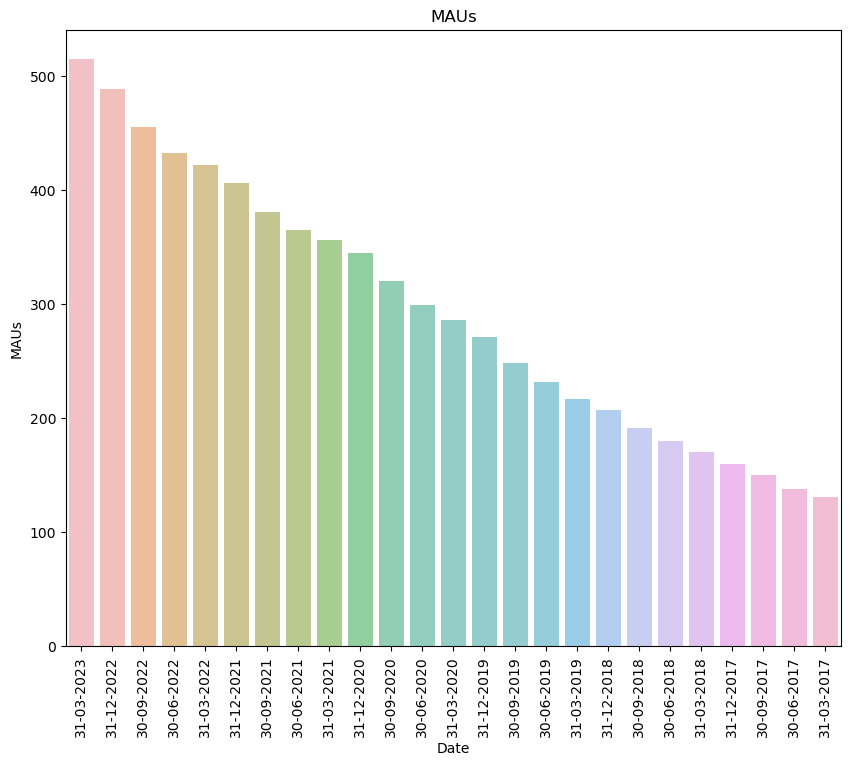

In [101]:
plt.figure(figsize=(10,8))
sns.barplot(x='Date',y='MAUs',data=MAU,alpha=0.6)
plt.xticks(rotation=90)
plt.title('MAUs')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

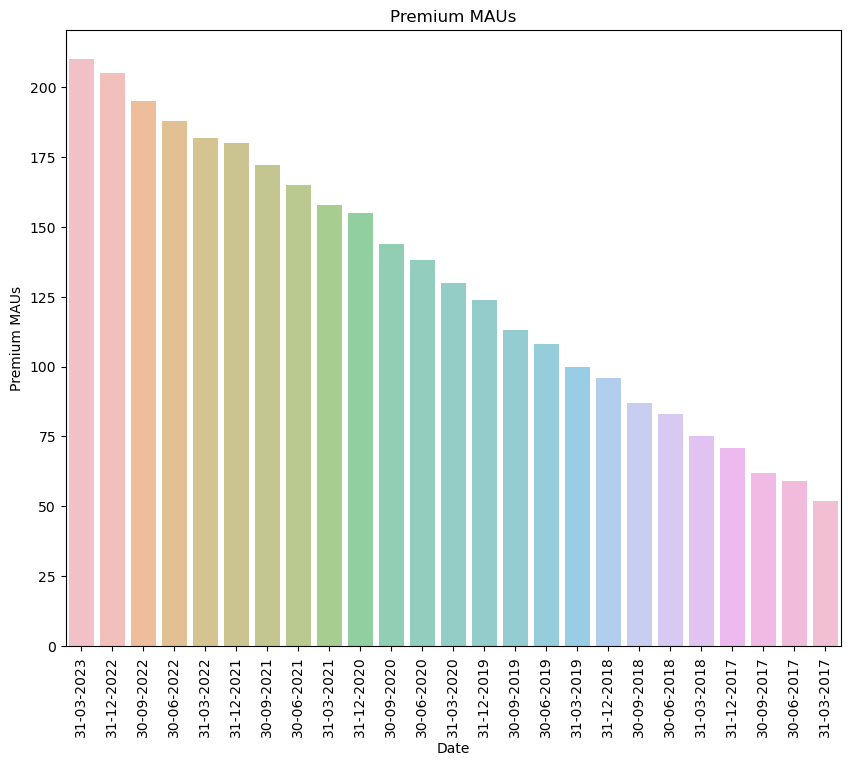

In [102]:
plt.figure(figsize=(10,8))
sns.barplot(x='Date',y='Premium MAUs',data=MAU,alpha=0.6)
plt.xticks(rotation=90)
plt.title('Premium MAUs')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

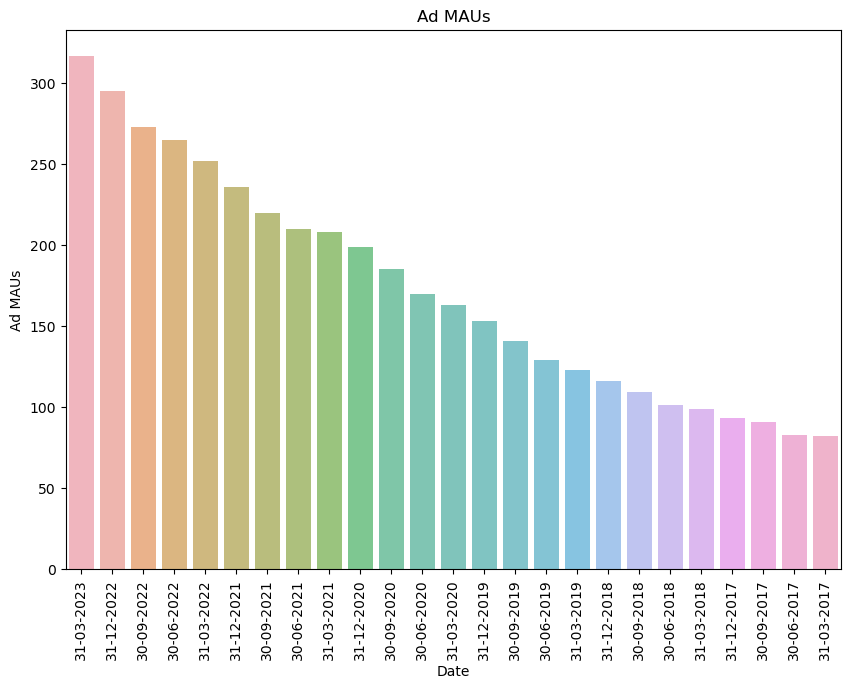

In [103]:
plt.figure(figsize=(10,7))
sns.barplot(x='Date',y='Ad MAUs',data=MAU,alpha=0.7)
plt.xticks(rotation=90)
plt.title('Ad MAUs')
plt.show

### From these we get that, as month goes on, there is increase in the MAUs,Premium MAUs and Ad MAUs. 

<Axes: ylabel='Proportion'>

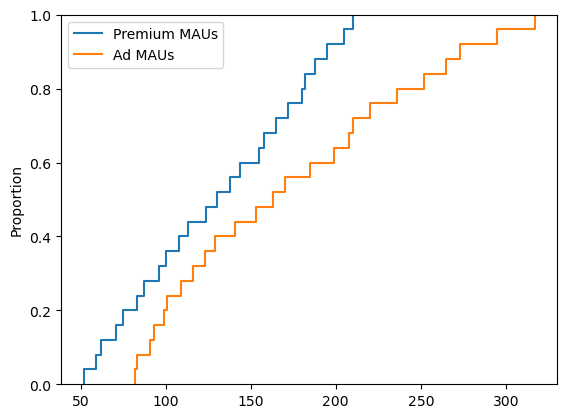

In [104]:
MAU2=Spotify.loc[:,['Premium MAUs', 'Ad MAUs']]
sns.ecdfplot(data=MAU2)

### Most MAUs are using advertisment showing Spotify. 

In [105]:
Ad=Spotify.loc[:,['Date','Ad Revenue', 'Ad Cost of revenue', 'Ad gross Profit']]
Ad

,Date,Ad Revenue,Ad Cost of revenue,Ad gross Profit
0,31-03-2023,329.0,339.0,-10.0
1,31-12-2022,449.0,426.0,23.0
2,30-09-2022,385.0,378.0,7.0
3,30-06-2022,360.0,356.0,4.0
4,31-03-2022,282.0,286.0,-4.0
5,31-12-2021,394.0,352.0,42.0
6,30-09-2021,323.0,288.0,35.0
7,30-06-2021,275.0,245.0,30.0
8,31-03-2021,216.0,206.0,10.0
9,31-12-2020,281.0,251.0,30.0


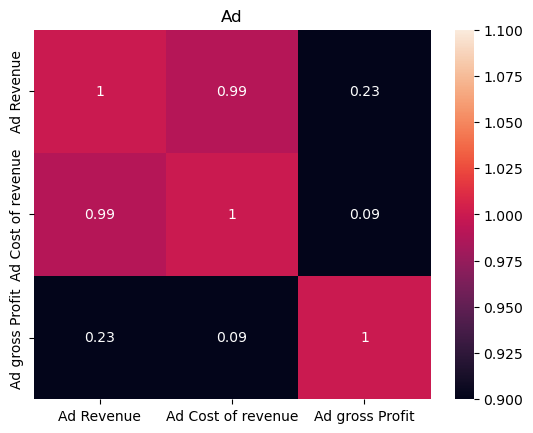

In [106]:
sns.heatmap(Ad[['Ad Revenue', 'Ad Cost of revenue', 'Ad gross Profit']].corr(),annot=True,vmin=1)
plt.title('Ad')
plt.show()

### Ad Revenue is the sum of Ad Cost of revenue and Ad gross Profit. So by visualizing and extracting Ad Revenue, we can find which all months have more Ad Revenue

In [114]:
Ad.sort_values('Ad gross Profit',inplace=True)

In [115]:
Ad

,Date,Ad Revenue,Ad Cost of revenue,Ad gross Profit
11,30-06-2020,131.0,147.0,-16.0
24,31-03-2017,74.0,87.0,-13.0
0,31-03-2023,329.0,339.0,-10.0
12,31-03-2020,148.0,157.0,-9.0
4,31-03-2022,282.0,286.0,-4.0
10,30-09-2020,185.0,184.0,1.0
3,30-06-2022,360.0,356.0,4.0
2,30-09-2022,385.0,378.0,7.0
8,31-03-2021,216.0,206.0,10.0
16,31-03-2019,126.0,115.0,11.0


###  <b>* 30-06-2020,31-03-2017,31-03-2023,31-03-2020 & 31-03-2022 have negative Ad gross profits.	

<function matplotlib.pyplot.show(close=None, block=None)>

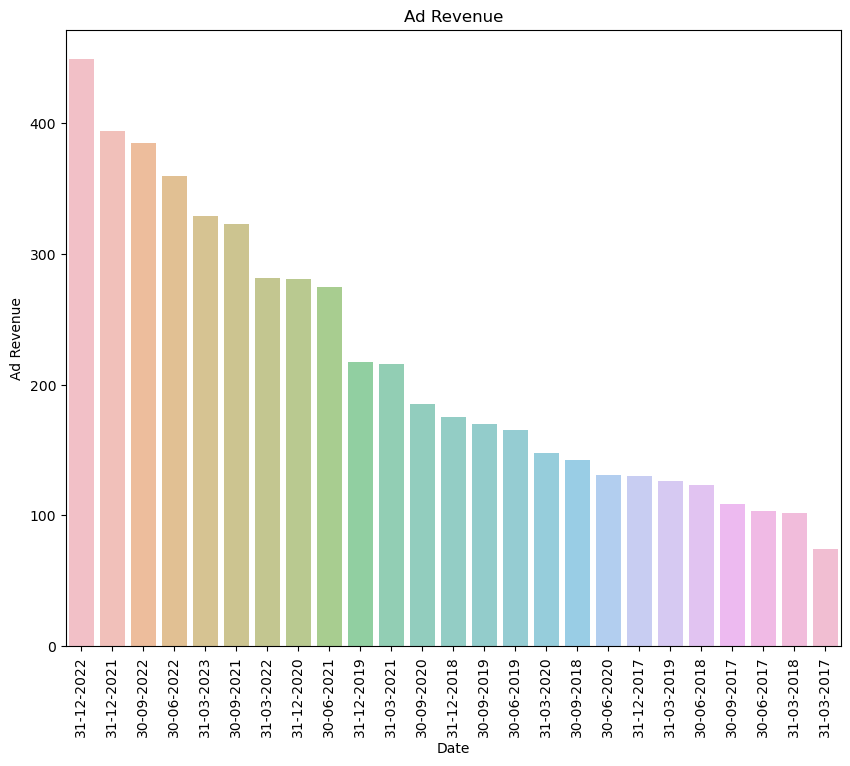

In [109]:
plt.figure(figsize=(10,8))
sns.barplot(x='Date',y='Ad Revenue',data=Ad,alpha=0.6)
plt.xticks(rotation=90)
plt.title('Ad Revenue')
plt.show

### Ad Revenue is more on December 2022 and this is based on the Ad gross Profit. For example in March 2023 Ad gross Profit is -10.0. This affected the revenue. 

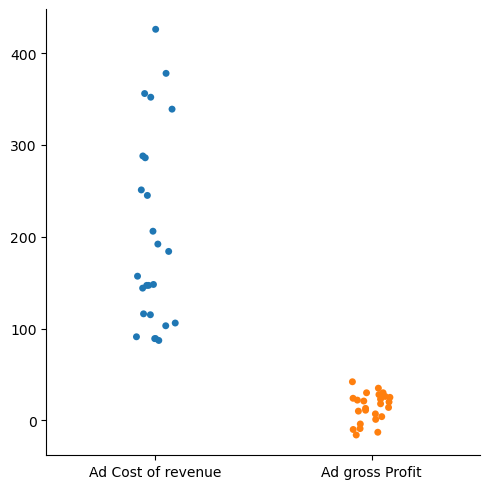

In [46]:
sns.catplot(data=Spotify.loc[:,['Ad Cost of revenue', 'Ad gross Profit']])

## From the above plot we can see some of the values are below 0. So the profit on that month is below zero, which shows loss in profit. 

In [47]:
Spotify.columns

Index(['Date', 'Total Revenue', 'Cost of Revenue', 'Gross Profit',
       'Premium Revenue', 'Premium Cost Revenue', 'Premium Gross Profit',
       'Ad Revenue', 'Ad Cost of revenue', 'Ad gross Profit', 'MAUs',
       'Premium MAUs', 'Ad MAUs', 'Premium ARPU', 'Sales and Marketing Cost',
       'Research and Development Cost', 'Genreal and Adminstraive Cost'],
      dtype='object')

In [48]:
Premium=Spotify.loc[:,['Date','Premium Revenue', 'Premium Cost Revenue', 'Premium Gross Profit',]]
Premium

,Date,Premium Revenue,Premium Cost Revenue,Premium Gross Profit
0,31-03-2023,2713.0,1937.0,776.0
1,31-12-2022,2717.0,1939.0,778.0
2,30-09-2022,2651.0,1908.0,743.0
3,30-06-2022,2504.0,1804.0,700.0
4,31-03-2022,2379.0,1704.0,675.0
5,31-12-2021,2295.0,1625.0,670.0
6,30-09-2021,2178.0,1545.0,633.0
7,30-06-2021,2056.0,1423.0,633.0
8,31-03-2021,1931.0,1393.0,538.0
9,31-12-2020,1887.0,1342.0,545.0


In [49]:
c=Spotify['Premium Revenue']-Spotify['Premium Cost Revenue']
c

0     776.0
1     778.0
2     743.0
3     700.0
4     675.0
5     670.0
6     633.0
7     633.0
8     538.0
9     545.0
10    488.0
11    495.0
12    481.0
13    449.0
14    419.0
15    413.0
16    362.0
17    361.0
18    316.0
19    309.0
20    270.0
21    257.0
22    212.0
23    218.0
24    118.0
dtype: float64

## Premium Revenue is the sum of Premium Cost revenue and Premium gross Profit. So by visualizing and extracting Premium Revenue, we can find which all months have more Premium Revenue 

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2400x1500 with 0 Axes>

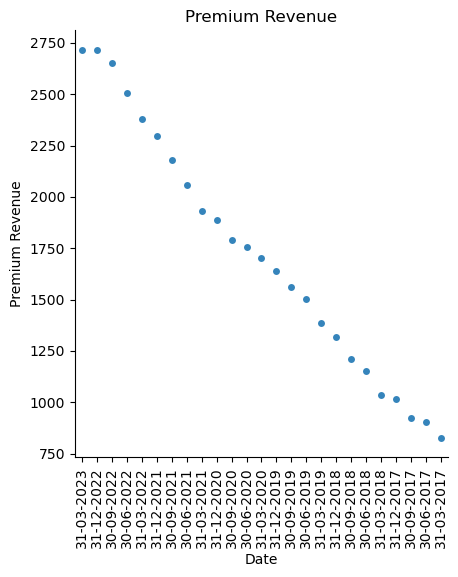

In [50]:
plt.figure(figsize=(24,15))
sns.catplot(x='Date',y='Premium Revenue',data=Premium,alpha=0.9)
plt.xticks(rotation=90)
plt.title('Premium Revenue')
plt.show

## Premium Revenue value is more on December 2022, and on March 2023 it slightly decreased 

<Axes: >

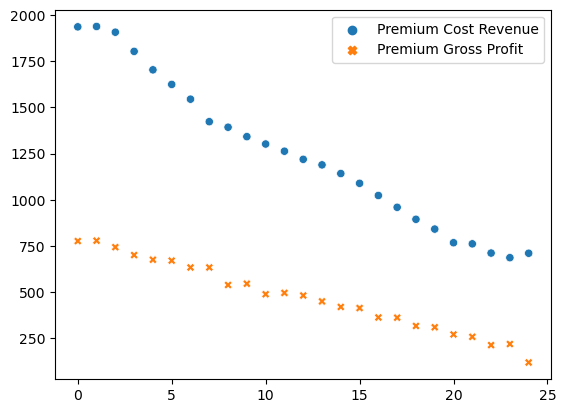

In [51]:
sns.scatterplot(data=Spotify.loc[:,['Premium Cost Revenue', 'Premium Gross Profit']])

In [52]:
Spotify.columns

Index(['Date', 'Total Revenue', 'Cost of Revenue', 'Gross Profit',
       'Premium Revenue', 'Premium Cost Revenue', 'Premium Gross Profit',
       'Ad Revenue', 'Ad Cost of revenue', 'Ad gross Profit', 'MAUs',
       'Premium MAUs', 'Ad MAUs', 'Premium ARPU', 'Sales and Marketing Cost',
       'Research and Development Cost', 'Genreal and Adminstraive Cost'],
      dtype='object')

In [116]:
Final=Spotify.loc[:,['Date','Total Revenue','Premium Revenue','Ad Revenue', 'Cost of Revenue','Premium Cost Revenue','Ad Cost of revenue', 'Gross Profit','Premium Gross Profit','Ad gross Profit']]
Final

,Date,Total Revenue,Premium Revenue,Ad Revenue,Cost of Revenue,Premium Cost Revenue,Ad Cost of revenue,Gross Profit,Premium Gross Profit,Ad gross Profit
0,31-03-2023,3042.0,2713.0,329.0,2276.0,1937.0,339.0,776.0,776.0,-10.0
1,31-12-2022,3166.0,2717.0,449.0,2365.0,1939.0,426.0,801.0,778.0,23.0
2,30-09-2022,3036.0,2651.0,385.0,2286.0,1908.0,378.0,750.0,743.0,7.0
3,30-06-2022,2864.0,2504.0,360.0,2160.0,1804.0,356.0,704.0,700.0,4.0
4,31-03-2022,2661.0,2379.0,282.0,1990.0,1704.0,286.0,671.0,675.0,-4.0
5,31-12-2021,2689.0,2295.0,394.0,1977.0,1625.0,352.0,712.0,670.0,42.0
6,30-09-2021,2501.0,2178.0,323.0,1833.0,1545.0,288.0,668.0,633.0,35.0
7,30-06-2021,2331.0,2056.0,275.0,1668.0,1423.0,245.0,663.0,633.0,30.0
8,31-03-2021,2147.0,1931.0,216.0,1599.0,1393.0,206.0,548.0,538.0,10.0
9,31-12-2020,2168.0,1887.0,281.0,1593.0,1342.0,251.0,575.0,545.0,30.0


In [121]:
Final['Sum of premium and ad revenue']=Final['Premium Revenue']+Final['Ad Revenue']
Final['Sum of premium and ad revenue']

0     3042.0
1     3166.0
2     3036.0
3     2864.0
4     2661.0
5     2689.0
6     2501.0
7     2331.0
8     2147.0
9     2168.0
10    1975.0
11    1889.0
12    1848.0
13    1855.0
14    1731.0
15    1667.0
16    1511.0
17    1495.0
18    1352.0
19    1273.0
20    1139.0
21    1148.0
22    1032.0
23    1007.0
24     902.0
Name: Sum of premium and ad revenue, dtype: float64

In [122]:
Final.loc[:,['Total Revenue','Sum of premium and ad revenue']]

,Total Revenue,Sum of premium and ad revenue
0,3042.0,3042.0
1,3166.0,3166.0
2,3036.0,3036.0
3,2864.0,2864.0
4,2661.0,2661.0
5,2689.0,2689.0
6,2501.0,2501.0
7,2331.0,2331.0
8,2147.0,2147.0
9,2168.0,2168.0


In [123]:
Final['Sum of premium and ad cost revenue']=Final['Premium Cost Revenue']+Final['Ad Cost of revenue']

In [124]:
Final.loc[:,['Cost of Revenue','Sum of premium and ad cost revenue']]

,Cost of Revenue,Sum of premium and ad cost revenue
0,2276.0,2276.0
1,2365.0,2365.0
2,2286.0,2286.0
3,2160.0,2160.0
4,1990.0,1990.0
5,1977.0,1977.0
6,1833.0,1833.0
7,1668.0,1668.0
8,1599.0,1599.0
9,1593.0,1593.0


In [125]:
Final['Sum of premium and ad gross profit']=Final['Premium Gross Profit']+Final['Ad gross Profit']

In [127]:
Final.loc[:,['Gross Profit','Sum of premium and ad gross profit']]

,Gross Profit,Sum of premium and ad gross profit
0,776.0,766.0
1,801.0,801.0
2,750.0,750.0
3,704.0,704.0
4,671.0,671.0
5,712.0,712.0
6,668.0,668.0
7,663.0,663.0
8,548.0,548.0
9,575.0,575.0


###   There are relations between Total Revenue, Premium Revenue,Ad Revenue, Cost of Revenue,Premium Cost Revenue,Ad Cost of revenue, Gross Profit,Premium Gross Profit and Ad gross Profit. Total revenue is the sum of Ad revenue and premium revenue, same as cost of revenue and Gross profit. When analysing the data, there is error in Gross profit data, where  data in index 0 does not follow the relation, while rest of the data follows.

In [128]:
Spotify['Gross Profit'].replace({776.0: 766.0},inplace=True)

In [129]:
Spotify

,Date,Total Revenue,Cost of Revenue,Gross Profit,Premium Revenue,Premium Cost Revenue,Premium Gross Profit,Ad Revenue,Ad Cost of revenue,Ad gross Profit,MAUs,Premium MAUs,Ad MAUs,Premium ARPU,Sales and Marketing Cost,Research and Development Cost,Genreal and Adminstraive Cost
0,31-03-2023,3042.0,2276.0,766.0,2713.0,1937.0,776.0,329.0,339.0,-10.0,515.0,210.0,317.0,4.32,347.0,435.0,140.0
1,31-12-2022,3166.0,2365.0,801.0,2717.0,1939.0,778.0,449.0,426.0,23.0,489.0,205.0,295.0,4.55,453.0,415.0,164.0
2,30-09-2022,3036.0,2286.0,750.0,2651.0,1908.0,743.0,385.0,378.0,7.0,456.0,195.0,273.0,4.63,432.0,386.0,160.0
3,30-06-2022,2864.0,2160.0,704.0,2504.0,1804.0,700.0,360.0,356.0,4.0,433.0,188.0,265.0,4.54,391.0,336.0,171.0
4,31-03-2022,2661.0,1990.0,671.0,2379.0,1704.0,675.0,282.0,286.0,-4.0,422.0,182.0,252.0,4.38,296.0,250.0,131.0
5,31-12-2021,2689.0,1977.0,712.0,2295.0,1625.0,670.0,394.0,352.0,42.0,406.0,180.0,236.0,4.40,340.0,253.0,126.0
6,30-09-2021,2501.0,1833.0,668.0,2178.0,1545.0,633.0,323.0,288.0,35.0,381.0,172.0,220.0,4.34,280.0,208.0,105.0
7,30-06-2021,2331.0,1668.0,663.0,2056.0,1423.0,633.0,275.0,245.0,30.0,365.0,165.0,210.0,4.29,279.0,255.0,117.0
8,31-03-2021,2147.0,1599.0,548.0,1931.0,1393.0,538.0,216.0,206.0,10.0,356.0,158.0,208.0,4.12,236.0,196.0,102.0
9,31-12-2020,2168.0,1593.0,575.0,1887.0,1342.0,545.0,281.0,251.0,30.0,345.0,155.0,199.0,4.26,294.0,232.0,118.0


In [130]:
F1=Spotify['Cost of Revenue']+Spotify['Gross Profit']
F1

0     3042.0
1     3166.0
2     3036.0
3     2864.0
4     2661.0
5     2689.0
6     2501.0
7     2331.0
8     2147.0
9     2168.0
10    1975.0
11    1889.0
12    1848.0
13    1855.0
14    1731.0
15    1667.0
16    1511.0
17    1495.0
18    1352.0
19    1273.0
20    1139.0
21    1449.0
22    1032.0
23    1007.0
24     902.0
dtype: float64

In [131]:
Final2=Spotify.loc[:,['Date','Total Revenue', 'Cost of Revenue', 'Gross Profit']]
Final2

,Date,Total Revenue,Cost of Revenue,Gross Profit
0,31-03-2023,3042.0,2276.0,766.0
1,31-12-2022,3166.0,2365.0,801.0
2,30-09-2022,3036.0,2286.0,750.0
3,30-06-2022,2864.0,2160.0,704.0
4,31-03-2022,2661.0,1990.0,671.0
5,31-12-2021,2689.0,1977.0,712.0
6,30-09-2021,2501.0,1833.0,668.0
7,30-06-2021,2331.0,1668.0,663.0
8,31-03-2021,2147.0,1599.0,548.0
9,31-12-2020,2168.0,1593.0,575.0


### Now the value changed in Gross profit 

<function matplotlib.pyplot.show(close=None, block=None)>

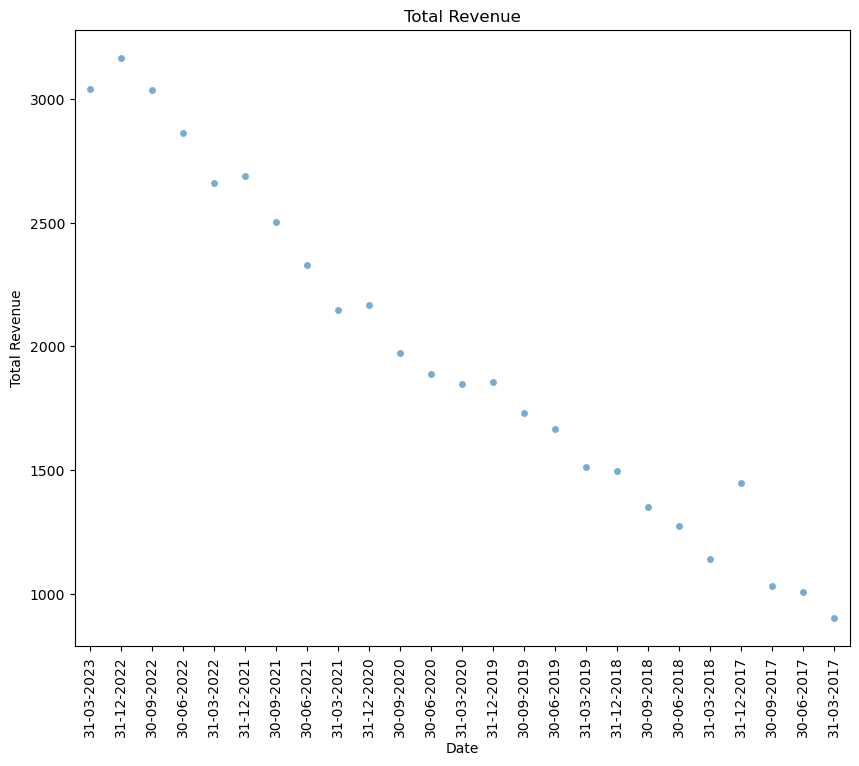

In [132]:
plt.figure(figsize=(10,8))
sns.swarmplot(x='Date',y='Total Revenue',data=Final2,alpha=0.6)
plt.xticks(rotation=90)
plt.title('Total Revenue')
plt.show

### December 2022 has largest revenue and on March 2023 it got decreased.

In [133]:
User=Spotify.loc[:,['Date','Total Revenue', 'MAUs','Premium MAUs','Ad MAUs']]
User

,Date,Total Revenue,MAUs,Premium MAUs,Ad MAUs
0,31-03-2023,3042.0,515.0,210.0,317.0
1,31-12-2022,3166.0,489.0,205.0,295.0
2,30-09-2022,3036.0,456.0,195.0,273.0
3,30-06-2022,2864.0,433.0,188.0,265.0
4,31-03-2022,2661.0,422.0,182.0,252.0
5,31-12-2021,2689.0,406.0,180.0,236.0
6,30-09-2021,2501.0,381.0,172.0,220.0
7,30-06-2021,2331.0,365.0,165.0,210.0
8,31-03-2021,2147.0,356.0,158.0,208.0
9,31-12-2020,2168.0,345.0,155.0,199.0


In [135]:
User['Total MAUs'] = Spotify['MAUs'] + Spotify ['Premium MAUs'] + Spotify['Ad MAUs']
User['Total MAUs']

0     1042.0
1      989.0
2      924.0
3      886.0
4      856.0
5      822.0
6      773.0
7      740.0
8      722.0
9      699.0
10     649.0
11     607.0
12     579.0
13     548.0
14     502.0
15     469.0
16     440.0
17     419.0
18     387.0
19     364.0
20     344.0
21     324.0
22     303.0
23     280.0
24     265.0
Name: Total MAUs, dtype: float64

In [139]:
user_revenue = User.loc[:,['Date','Total MAUs','Total Revenue']]
user_revenue.sort_values('Total Revenue', ascending= False)

,Date,Total MAUs,Total Revenue
1,31-12-2022,989.0,3166.0
0,31-03-2023,1042.0,3042.0
2,30-09-2022,924.0,3036.0
3,30-06-2022,886.0,2864.0
5,31-12-2021,822.0,2689.0
4,31-03-2022,856.0,2661.0
6,30-09-2021,773.0,2501.0
7,30-06-2021,740.0,2331.0
9,31-12-2020,699.0,2168.0
8,31-03-2021,722.0,2147.0


## Conclusion

1. Spotify generated highest revenue on December 2022.
2. Average cost spend on sales and marketing is 243.84, Resaerch and Development is 203.0 and General and   Administrative is 102.36.
3. For Research and Development cost spend is increasing as the month increases.
4. Premium Average Revenue Per User us decreasing as the month increases.
5. Premium MAUs(Most Active Users) and Ad MAUs are increasing, in that most MAUs are using advertisment containing Spotify.
6. Reports from 30-06-2020,31-03-2017,31-03-2023,31-03-2020 & 31-03-2022 months show negative Ad gross profits, Which affects Ad revenue and lead to Total Revenue.
7. Total active users are more on 31-03-2023 when compared to 31-12-2022, but while checking total revenue generated,on Decemder 2022 generated more than March 2023.